## Supervised learning example

In this notebook we explore a classical machine learning approach to a classification problem using a supervised learning approach and an algorithm called [Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine). We will use the library [scikit-learn](https://scikit-learn.org/stable/).

In this example we will use the `iris dataset` ([link to the dataset card](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)). 
This dataset is already included in the scikit-learn library, so we do not need to do any preprocessing.

In [2]:
from sklearn import datasets
 
# Import the dataset
iris = datasets.load_iris()

Let us have a look at the shape of the dataset.

In [3]:
n_data_points = len(iris['data'])
n_features = len(iris['feature_names'])
feature_names = iris['feature_names']
targets = iris['target_names']
print(f'The dataset has {n_data_points} datapoints')
print(f'The data has {n_features} features, they are {feature_names}')
print(f'The data can have targets {targets}')

The dataset has 150 datapoints
The data has 4 features, they are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
The data can have targets ['setosa' 'versicolor' 'virginica']


Consider only two features (sepal length and sepal width), so that we can plot all the datapoints in the plane.

In [ ]:
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]

# Define the labels
y = iris.target

Let us define some SVM models with different kernels: different kernels will determine which shape the decision boundaries between different classes can take. They take various parameters, but all of them take the SVM regularization parameter C that determines how 'strict' or 'relaxed' the model is with respect to outliers.

In [5]:
from sklearn import svm

# We create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0  # This is the SVM regularization parameter
models = {
    'Linear': svm.SVC(kernel="linear", C=C),
    'RBF': svm.SVC(kernel="rbf", gamma=0.7, C=C),
    'Polynomial': svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
}

Let us divide the data into training and testing, we shuffle the data before splitting.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Fit all models on training and compute their accuracy on testing.

In [7]:
from sklearn.metrics import accuracy_score

for m in models:
    # Fit the model
    models[m].fit(X_train, y_train)
    predictions = models[m].predict(X_test)
    print(f'The accuracy for the {m} model is ', accuracy_score(y_test, predictions))

The accuracy for the Linear model is  0.8
The accuracy for the RBF model is  0.8
The accuracy for the Polynomial model is  0.7666666666666667


Accuracy is not the best metric, so we visualise how well the model is doing with some confusion matrices.

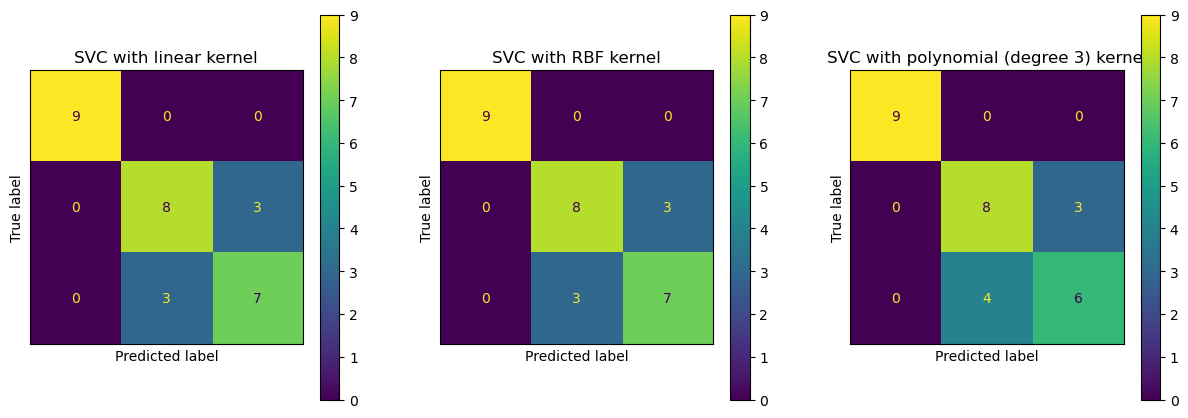

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, sub = plt.subplots(1, 3, figsize=(15,5))

# Title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

for clf, title, ax in zip(models, titles, sub.flatten()):

    cm = confusion_matrix(y_test, models[clf].predict(X_test))
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = list(range(3)))
    cm_display.plot(ax=ax)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Plotting different decision boundaries

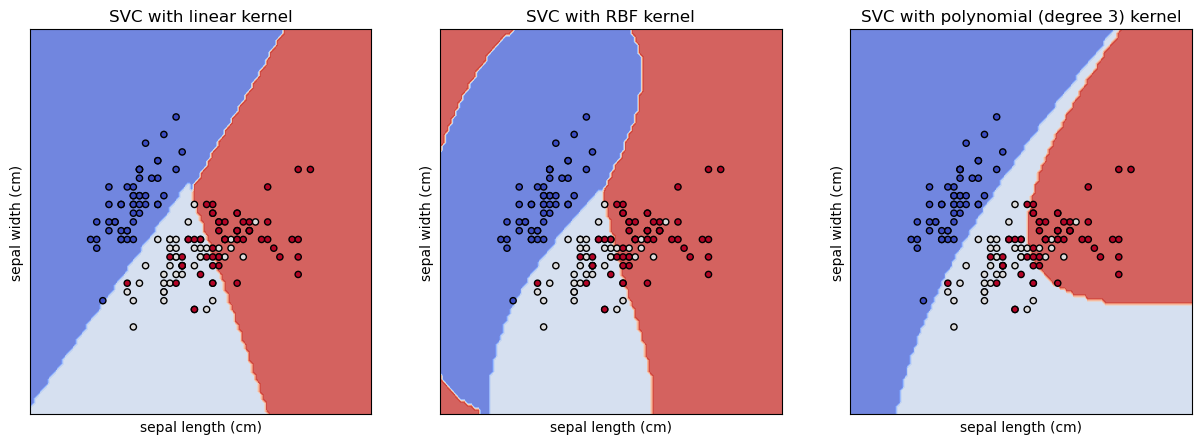

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Fit all models to the data
models_fitted = (clf.fit(X, y) for clf in models.values())

# Title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 1x3 grid for plotting.
fig, sub = plt.subplots(1, 3, figsize=(15,5))
X0, X1 = X[:, 0], X[:, 1]

# Just some boring plotting code
for clf, title, ax in zip(models_fitted, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Things to try:
- What would the accuracy have been if we were testing on the training set rather than the testing set? What would the confusion matrices look like?
- How does the accuracy on testing change as we increase/decrease the proportion of data used for training?
- We have used the first two columns of the dataset. What happens if we use the last two? Or any other two?
- Does playing with the regularization parameter C change the outcome?